# How can a meal delivery service improve operations?

## Findings
* The most popular food category in each of the regions is Beverages
* Cities 526 and 590 are the cities that have more than three centers. They have 8 and 9 fulfillment centers respectively.
- * For city 526, the number of fulfillment centers should be maintained since almost all the centers' deliveries are above or not too below the mean deliveries (2964.60 ~ 3000)
- * For city 590, it is noticed that centers 91 and 41 deliveries are way below the mean deliveries. It is advised to merge these two centers into 1.
* 8% of the deliveries were ordered by mail. This means there is probability of users buying more if the centers can take more orders. Also, 11% of the deliveries were meals that featured on the website. This means that there is a probability that the more meals featured on the site, the more the purchases


In [89]:
import numpy as np

In [1]:
import pandas as pd
deliveries = pd.read_csv('data/meal_deliveries.csv')


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
deliveries.head()

,id,week,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,checkout_price,base_price,emailer,featured,orders
0,1491015,6,67,638,56,B,7.0,2290,Rice Bowl,Indian,157.14,311.43,0,0,5075
1,1440194,40,92,526,34,C,2.9,2704,Other Snacks,Thai,291.03,291.03,0,0,41
2,1415786,2,81,526,34,A,4.0,1109,Rice Bowl,Indian,258.99,294.94,1,0,379
3,1074662,12,152,576,34,B,4.0,1109,Rice Bowl,Indian,268.69,268.69,0,0,690
4,1198250,116,10,590,56,B,6.3,1207,Beverages,Continental,354.05,493.76,0,0,135


In [81]:
deliveries.describe()

,id,week,region_code,op_area,meal_id,checkout_price,base_price,emailer,featured,orders
count,2.282740e+05,228274.00000,228274.000000,228274.000000,228274.000000,228274.000000,228274.000000,228274.000000,228274.000000,228274.000000
mean,1.249986e+06,74.82461,56.599197,4.085916,2023.756889,331.814380,353.670054,0.081192,0.109964,262.167908
std,1.444976e+05,41.50712,17.644380,1.093213,547.857164,152.647323,160.471387,0.273130,0.312846,395.097969
min,1.000000e+06,1.00000,23.000000,0.900000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000
25%,1.124800e+06,39.00000,34.000000,3.600000,1558.000000,228.920000,243.500000,0.000000,0.000000,54.000000
50%,1.250006e+06,76.00000,56.000000,4.000000,1971.000000,295.850000,310.430000,0.000000,0.000000,136.000000
75%,1.375372e+06,111.00000,77.000000,4.500000,2539.000000,442.380000,456.930000,0.000000,0.000000,324.000000
max,1.499999e+06,145.00000,93.000000,7.000000,2956.000000,866.270000,866.270000,1.000000,1.000000,24299.000000


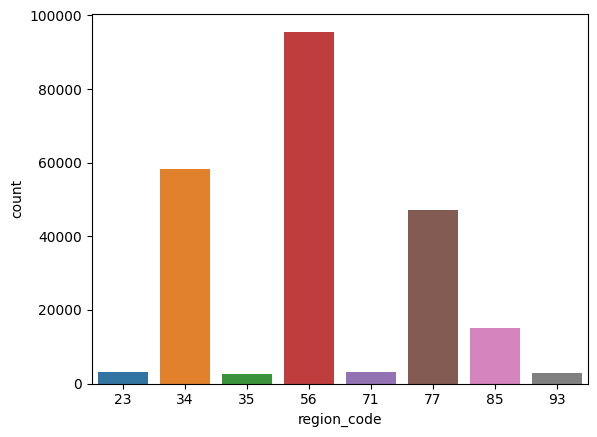

In [4]:
sns.countplot(x='region_code',data=deliveries)
plt.show()

In [5]:
deliveries['city_code']=deliveries['city_code'].apply(lambda x: str(x))

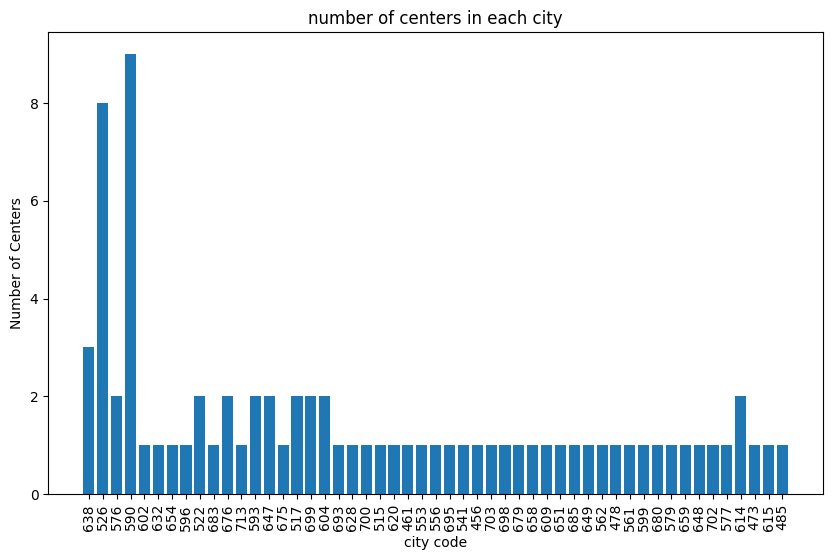

In [6]:
# distribution of fullfilment centers in cities

cities=deliveries['city_code'].unique()
df_cities=deliveries.groupby(by='city_code')
city_centers=[]
for city in cities:
    city_grp=df_cities.get_group(city) 
    centers=len(city_grp['center_id'].unique())
    city_centers.append(centers)
# plot the centers
plt.figure(figsize=(10,6))
plt.bar(cities,city_centers)
plt.ylabel('Number of Centers')
plt.xlabel('city code')
plt.title('number of centers in each city')
plt.xticks(rotation=90)
plt.show()

So city 590 has the higest number of centers (9) followed by cities 526(8) and 638(3)


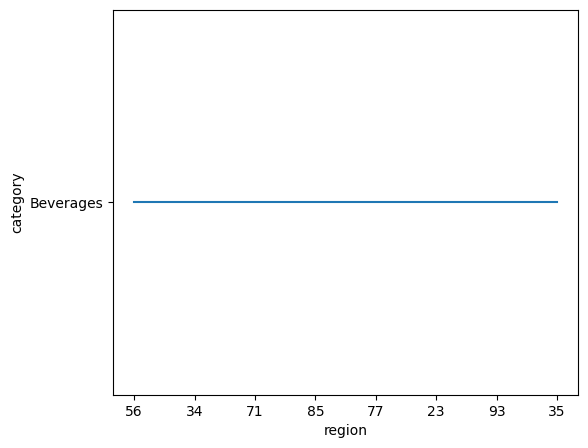

In [87]:
# find favorite meals in each region
deliveries['region_code']=deliveries['region_code'].apply(lambda x: str(x))
regions=deliveries['region_code'].unique()
del_reg=deliveries.groupby(by='region_code')
main_cat=[]


for reg_code in regions:
    reg=del_reg.get_group(reg_code)
    reg_cat=reg['category'].describe().top
    
    
    main_cat.append(reg_cat)
    
plt.figure(figsize=(6,5))
##make dataframe with both
reg_categories=pd.DataFrame({'region':regions,'category':main_cat})
#reg_cuisines
sns.lineplot( x='region', y='category',data=reg_categories)
plt.show()


So the most popular category among the regions is Beverages
Next: check for most pop

In [26]:
order_by_mail=deliveries[deliveries['emailer']==1]
featured=deliveries[deliveries['featured']==1]
featured_mail=deliveries[(deliveries['featured']==1) & (deliveries['emailer']==1)]
no_featured_mail=deliveries[(deliveries['featured']==0) & (deliveries['emailer']==0)]
Dict1 = dict({
    'mail':order_by_mail.shape[0],
    'featured':featured.shape[0],
    'none':no_featured_mail.shape[0]
})
featured_mail_dict= dict({
    'featured & mail':featured_mail.shape[0],
    'none':no_featured_mail.shape[0]
})


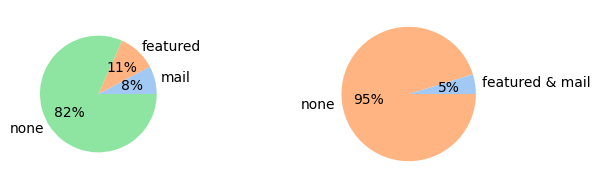

In [41]:
#pie chart to show the percentages
colors = sns.color_palette('pastel')[0:5]
plt.subplot(2, 3, 1)
plt.pie(Dict1.values(),autopct='%.0f%%',labels=Dict1.keys(),colors=colors)

plt.subplot(2, 2, 2)
plt.pie(featured_mail_dict.values(),labels=featured_mail_dict.keys(),autopct='%.0f%%',colors=colors)

plt.show()

So there is a probability of increase in sales if;
* more meals are featured on the site.
* If they put in more effort to deliver through mail

Now. For cities 526 and 590 (the cities with more than 3 service centers), I want to know the total number of orders from both their city centers so as to know which recommendation to make

In [47]:
# firstly i will check the number of deliveries by each city
total_city_deliveries=[]
for city in cities:
    city_deliveries=deliveries[deliveries['city_code']==city].shape[0]
    total_city_deliveries.append(city_deliveries)

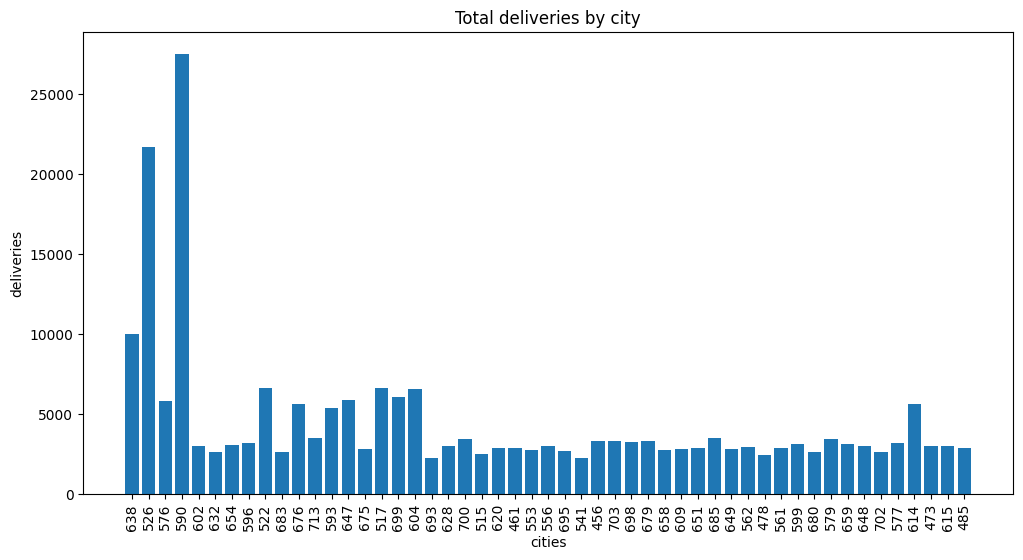

In [53]:
#plot the curve
plt.figure(figsize=(12,6))
plt.bar(cities,total_city_deliveries)
plt.title('Total deliveries by city')
plt.xlabel('cities')
plt.ylabel('deliveries')
plt.xticks(rotation=90)
plt.show()

Now I want to see the total deliveries for every fulfillment center within cites 526 and 590

In [76]:
#get service centers for 526 and compare the orders
deliveries['center_id']=deliveries['center_id'].apply(lambda x: str(x))
del_526=deliveries[deliveries['city_code']=='526']
_526_centers=del_526['center_id'].unique()
_526_deliveries=[]
for center in _526_centers:
    center_del=del_526[del_526['center_id']==center].shape[0]    
    _526_deliveries.append(center_del)
# for 590
del_590=deliveries[deliveries['city_code']=='590']
_590_centers=del_590['center_id'].unique()
_590_deliveries=[]
for center in _590_centers:
    center_del=del_590[del_590['center_id']==center].shape[0]
    _590_deliveries.append(center_del)


In [65]:
#_526_centers # 81,92,162
del_526[del_526['city_code']==162].shape

(0, 15)

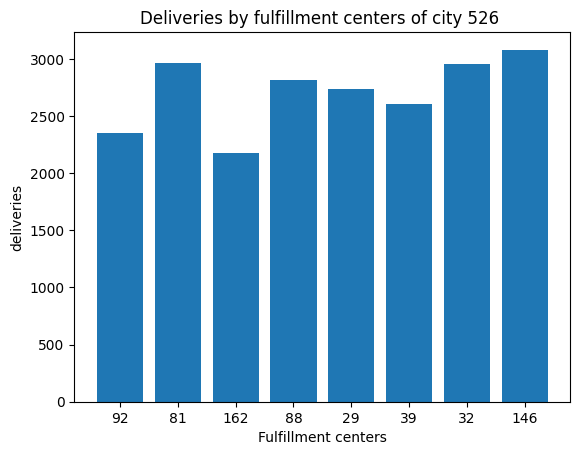

In [77]:
#plotting time 526 cities
#plt.subplot(2,1,1)
plt.bar(_526_centers,_526_deliveries)
plt.title('Deliveries by fulfillment centers of city 526 ')
plt.xlabel('Fulfillment centers')
plt.ylabel('deliveries')


plt.show()

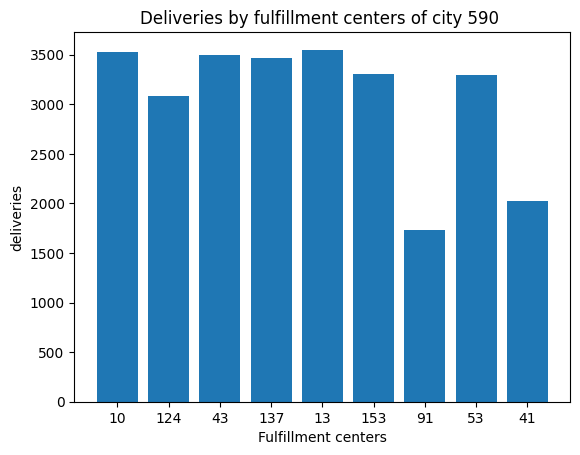

In [78]:
#plot for 590

plt.bar(_590_centers,_590_deliveries)
plt.title('Deliveries by fulfillment centers of city 590 ')
plt.xlabel('Fulfillment centers')
plt.ylabel('deliveries')

plt.show()

In [88]:
# get the mean deliveries per center
centers=deliveries['center_id'].unique()
deliveries_by_centers=[]
for center in centers:
    c=deliveries[deliveries['center_id']==center].shape[0]
    deliveries_by_centers.append(c)


In [91]:
np.mean(deliveries_by_centers)

2964.5974025974024